# __Project Proposal__

- In this project, I will use the Superhero Power Analytics dataset --from Kaggle-- to classify superheroes and villain characters based on their power level to predict if they would win a fight against each other. The goal is to determine if the model is able to successfully rank each class and predict who would win if a hero and a villain were to fight each other.
  - Planned classes: Hero, Villain, Neutral
  - Planned Prediction: The winner of a fight with characters picked at random from among the 3 groups
- Link to the Dataset: https://www.kaggle.com/datasets/shreyasur965/super-heroes-dataset/code

__Part 1: Data Exploration & Preprocessing__

- Task: Perform exploratory data analysis (EDA) on your chosen dataset to understand its structure and key characteristics. This includes handling missing values, outliers, and any necessary preprocessing steps such as normalization, encoding, or feature scaling. Summarize your findings.

  - Upon taking a look at the set we can see that the set contains 731 entries with each having up to 26 different features. For the purposes of my project I decided to plot the alignment to see how the heroes and villains are distributed in the dataset. From the plot generated we see that the vast majority of observations are heroes with about twice as many observations as villains, and a small portion representing neutral and unknown standing.

  - To preprocess my data I went ahead and dropped columns that will not be used in the model and OneHot encoded the categorical features. The other preprocessing step I decided to do was create a new variable, "total power", that sums up all numerical attributes into 1 singular stat, as well as format "-" in alignment to show as neutral, and "null" in the numerical features to show as 0 (making the stat 0 instead of the mean/median keeps certain characters from having an abnormal value for the selected power. Example, S.H.I.E.L.D soldier should not have more strength than The Hulk).

Hero data overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 731 non-null    int64  
 1   name               731 non-null    object 
 2   intelligence       566 non-null    float64
 3   strength           629 non-null    float64
 4   speed              566 non-null    float64
 5   durability         566 non-null    float64
 6   power              566 non-null    float64
 7   combat             566 non-null    float64
 8   full-name          630 non-null    object 
 9   alter-egos         731 non-null    object 
 10  aliases            731 non-null    object 
 11  place-of-birth     731 non-null    object 
 12  first-appearance   731 non-null    object 
 13  publisher          716 non-null    object 
 14  alignment          731 non-null    object 
 15  gender             731 non-null    object 
 16  race 

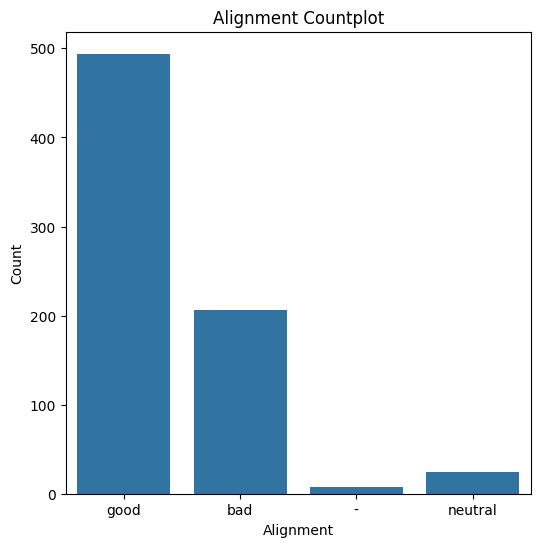


 --------------------------------------------------------- 

Final dataset: 
          name  intelligence  strength  speed  durability  power  combat  \
0       A-Bomb          38.0     100.0   17.0        80.0   24.0    64.0   
1   Abe Sapien          88.0      28.0   35.0        65.0  100.0    85.0   
2     Abin Sur          50.0      90.0   53.0        64.0   99.0    65.0   
3  Abomination          63.0      80.0   53.0        90.0   62.0    95.0   
4      Abraxas          88.0      63.0   83.0       100.0  100.0    55.0   

   total power  alignment_bad  alignment_good  alignment_neutral  
0        323.0          False            True              False  
1        401.0          False            True              False  
2        421.0          False            True              False  
3        443.0           True           False              False  
4        489.0           True           False              False   

Final dataset statistics: 
       intelligence    strength   

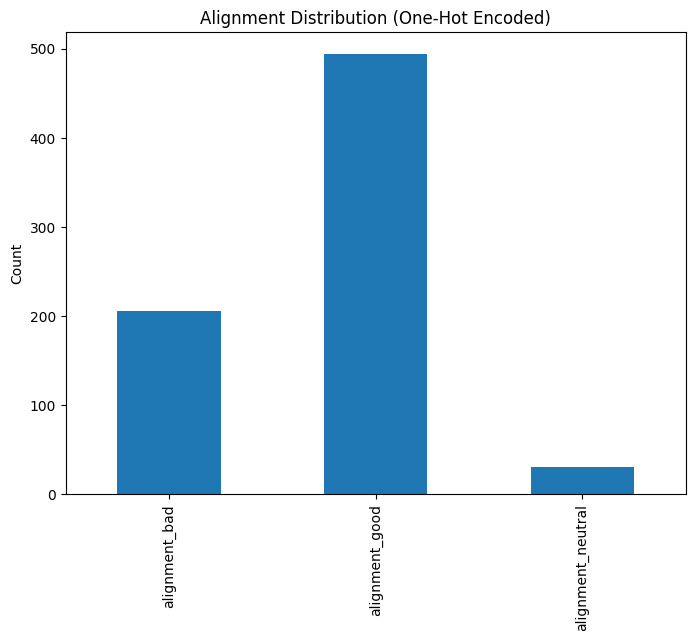

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Reading the file in
hero_data = read_csv('superheroes_data.csv')

# Display general information about the dataset, shape, and first few rows
print("Hero data overview: ")
hero_data.info()
print("\nDataset shape: ", hero_data.shape)
print("\nFirst few rows of the dataset: ")
print(hero_data.head())

# Checking missing values
print("\nMissing values:\n", hero_data.isnull().sum())

# Checking for duplicate rows and removing any duplicates
print(f"\nDuplicated rows: {hero_data.duplicated().sum()}\n")
hero_data = hero_data.drop_duplicates()

# Plot countplots for alignment to see the distribution of good vs. bad
plt.figure(figsize=(6, 6))
sns.countplot(data=hero_data, x='alignment')
plt.title('Alignment Countplot')
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.show()
print("\n", "---------------------------------------------------------", "\n")

# Preprocessing the dataset, dropping columns that won't be used
columns_keep = ["name", "intelligence", "strength", "speed", "durability", "power", "combat", "alignment"]
hero_data_updated = hero_data[columns_keep] # creating dataframe with desired features
hero_data_usable = hero_data_updated.copy() # Creating copy for modification

# Selecting features to sum and add the values to a new feature "total power"
columns_sum = ["intelligence", "strength", "speed", "durability", "power", "combat"]
hero_data_usable.loc[:, "total power"] = hero_data_usable[columns_sum].sum(axis=1)

# Formatting final dataset so that "-" in alignment shows as "neutral"
# and "null" on the numerical features show as 0 (null = 0)
hero_data_usable['alignment'] = hero_data_usable['alignment'].replace('-', 'neutral')
hero_data_usable = hero_data_usable.fillna(0)

# OneHot encoding
hero_data_usable = pd.get_dummies(hero_data_usable, columns=['alignment'])

# Displaying the final dataset, statistics about the final set, and plotting the final alignments.
print("Final dataset: ")
print(hero_data_usable.head(), "\n")

print("Final dataset statistics: ")
print(hero_data_usable.describe(), "\n")

alignment_cols = [col for col in hero_data_usable.columns if 'alignment_' in col]
hero_data_usable[alignment_cols].sum().plot(kind='bar', figsize=(8, 6))
plt.title('Alignment Distribution (One-Hot Encoded)')
plt.ylabel('Count')
plt.show()

__Part 2: Model Selection and Training__

- Task: Describe models you chose and why you chose them. Include details on the hyperparameters and training process. Document any adjustments made to improve performance and justify your choices. Use appropriate metrics to evaluate model performance and interpret  the results.

  - For my model I decided to use a Random Forest Clasifier since it uses the data from multiple tree lineages to combine and learn from to generate its prediction. In addition to that, the decision to choose this model was because it can handle both regression and classiication methods as well as be able to capture both complex and linear relationships between features.
  - For hyperparameters I used n_estimator = 100, meaning the initial forest will ocnsist of 100 trees, and random_state=42, ensuring reproducibility of your results, as it controls the random seed for the randomization processes. Increasing n_estimator I can change the size of the initial tree resulting in improved accuracy. During my tests, I changed the n_estimator between 100/200/1000/2000/10000 and the results varied with 100 and 10000 reaching my lowest accuracy (94%) and 1000 reaching up to 98%.
  - For training, the data was divided into train and test sets followed by a one-hot encoding for categorical features. Lastly, I removed the alignment as it was not needed for the later parts of the training.
  - I decided to use Accuracy as a primary metric since it measures the percentage of correct outcomes. As secondary methods I picked out precision and recall. Precision as it counts the percentage of positive preditions and recall since it measures the proportion of actual positive results.
  - Lastly I added a confusion matrix so there is a visual for the breakdown of true positives, false positives, true negatives, false negatives.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score


# Split into heroes, villains, and neutrals
hero_set = hero_data_usable[hero_data_usable['alignment_good'] == 1]
villain_set =  hero_data_usable[hero_data_usable['alignment_bad'] == 1]
neutral_set = hero_data_usable[hero_data_usable['alignment_neutral'] == 1]

print("Heroes: \n", hero_set, "\n")
print("Villains: \n", villain_set, "\n")
print("Neutrals: \n", neutral_set, "\n")

# Simulate random battles among the 3 groups
def simulate_battle(character1, character2):
  "Helper function that simulates the battles"
  "the charcter with higher total power wins"
  if character1['total power'] > character2['total power']:
    return "Hero wins"
  else:
    return "Villain wins"

battles = [] # record of battles
num_battles = 1000 # number of battles to simulate

for i in range(num_battles):
  # Picks between a hero or a neutral character
  char1 = hero_set.sample(1).iloc[0] if np.random.rand() < 0.5 else neutral_set.sample(1).iloc[0]
  # Sets char2 to be a randomly selected villain
  char2 = villain_set.sample(1).iloc[0]

  outcome = simulate_battle(char1, char2)

  # Combine stats for training (dropping unnecessary columns)
  battle_row = pd.concat(
      [
          char1.drop(['alignment_good', 'alignment_bad', 'alignment_neutral']).rename(lambda x: f'char1_{x}'),
          char2.drop(['alignment_good', 'alignment_bad', 'alignment_neutral']).rename(lambda x: f'char2_{x}')
      ]
  )
  battle_row['win'] = outcome
  battles.append(battle_row)

# Create DataFrame for the simulated battles
battle_data = pd.DataFrame(battles)
print("Simulated Battles:\n", battle_data.head())

# Split data into train and test
X = battle_data.drop(['win'], axis=1)
# If categorical columns exist, convert them (e.g., one-hot encoding for alignment)
X = pd.get_dummies(X, drop_first=True)  # Use one-hot encoding for categorical columns

y = battle_data['win']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size: ", len(X_train))
print("\nTesting set size: ", len(X_test), "\n")

# Build and train Model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Test predictor
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy, "\n")

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision, "\n")

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall, "\n")

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix, "\n")

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Heroes: 
                 name  intelligence  strength  speed  durability  power  \
0             A-Bomb          38.0     100.0   17.0        80.0   24.0   
1         Abe Sapien          88.0      28.0   35.0        65.0  100.0   
2           Abin Sur          50.0      90.0   53.0        64.0   99.0   
6        Adam Monroe          63.0      10.0   12.0       100.0  100.0   
7       Adam Strange          69.0      10.0   33.0        40.0   37.0   
..               ...           ...       ...    ...         ...    ...   
725     Yellowjacket          88.0      10.0   12.0        28.0   12.0   
726  Yellowjacket II          50.0      10.0   35.0        28.0   31.0   
727             Ymir          50.0     100.0   27.0       100.0   98.0   
728             Yoda          88.0      52.0   33.0        25.0  100.0   
729          Zatanna          81.0      10.0   23.0        28.0  100.0   

     combat  total power  alignment_bad  alignment_good  alignment_neutral  
0      64.0        323.0

__Challenges to Overcome__

- Throughout the project, I had to face many challenges. They varied from manipulating the dataset to where I kept all important features to hvaing to check if the result of my model were true positives/negatives or false positives/negatives.
- The first challenge I faced was doing a proper selection of features as well as deciding the proper way to separate my set to where I would be able to achieve my goal. To address this specific challenge I looked at the available features and considered which ones would be more relevant to my desired goal. Next I analyzed the different factors within each character to find a proper split for the dataset, and that is where I landed on the Hero/Villain/Neutral split.
- Another challenge I faced was deciding who gets to fight who. Upon further analysis, I realized that perhaps people of same alignment should not be fighting their companions (for example Hero vs Hero), which was easily overcome by having the model pick between a hero and a neutral to fight a villain. Following that challennge I faced another one which would have me questioning how many battles should be simulated to avoid overcomputing or undercomputing. This was addressed by a number of different tests which involved trying different number of simulated battles, as well as finding a sweet spot where I would not get diminishing returns due to overcomputing.
- For checking for true/false positives/negatives I implemented a confusion matrix to illustrate where each prediction was going.
- And the last challenge was choosing a model that would be robust enough for predicting the outcomes based on my data. For that, I chose a RandomForestClassifier as it robust enough to handle classification/prediction tasks, as well as getting its result based on a variety of differetn trees that the model uses during evaluation. Lastly it was because the model can handle both linear and non-linear relationships between features.
- Overall, the challenges faced allowed me to find new approaches in order to achieve my goal. For future work I could improve on having it pick a random stat rather than the combined value of all stats as well as implementing a way for neutrals to be able to fight heroes.